In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Read the output file #
df = pd.read_csv("outputs/hercules_output.csv", index_col=False)
df.head()

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001,hercules_comms.amr_wind.wind_farm_0.wind_direction,hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind,hercules_comms.amr_wind.wind_farm_0.wind_speed,...,py_sims.solar_farm_0.elev,py_sims.solar_farm_0.initial_conditions.power,py_sims.solar_farm_0.initial_conditions.dni,py_sims.solar_farm_0.outputs.power_mw,py_sims.solar_farm_0.outputs.dni,py_sims.solar_farm_0.outputs.aoi,py_sims.inputs.available_power,py_sims.inputs.sim_time_s,time,clock_time
0,1.0,2,126.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,318.0,25,1000,63.400442,23.915934,25.445615,0.000000,0.0,1.0,2024-09-05 09:36:07.670751
1,1.0,2,126.0,1948.666332,1943.839974,240.0,240.0,240.0,1.5,8.0,...,318.0,25,1000,63.448245,24.041017,25.445616,3892.506305,1.5,2.0,2024-09-05 09:36:07.832268
2,1.0,2,126.0,2157.452010,2152.108542,240.0,240.0,240.0,2.5,8.0,...,318.0,25,1000,63.496033,24.166100,25.445616,4309.560552,2.5,3.0,2024-09-05 09:36:08.004807
3,1.0,2,126.0,2209.648430,2204.175685,240.0,240.0,240.0,3.5,8.0,...,318.0,25,1000,63.543818,24.291184,25.445616,4413.824114,3.5,4.0,2024-09-05 09:36:08.174470
4,1.0,2,126.0,2222.697534,2217.192470,240.0,240.0,240.0,4.5,8.0,...,318.0,25,1000,63.591580,24.416268,25.445615,4439.890005,4.5,5.0,2024-09-05 09:36:08.329714


In [8]:
df.columns

Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.wind_direction',
       'hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind',
       'hercules_comms.amr_wind.wind_farm_0.wind_speed',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.001',
       'hercules_comms.helics.config.use_dash_frontend',
       'hercules_comms.helics.config.KAFKA',
       'hercules_comms.helics.config.helics.helicsport',
       'hercules_comms.helics.config.helics.deltat',
       'hercules_comms.helics.config.publication_interval',
  

Text(0.5, 0, 'time [hr]')

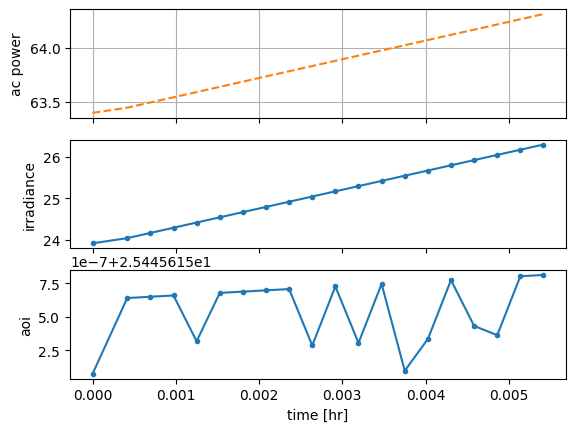

In [9]:
# first test solar module outputs
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]

if "external_signals.solar_power_reference_mw" in df.columns:
    power_setpoint = df["external_signals.solar_power_reference_mw"]
ac_power = df["py_sims.solar_farm_0.outputs.power_mw"]
# dc_power = df["py_sims.solar_farm_0.outputs.dc_power_mw"]
aoi = df["py_sims.solar_farm_0.outputs.aoi"]
irradiance = df["py_sims.solar_farm_0.outputs.dni"]

fig, ax = plt.subplots(3, 1, sharex="col")  # , figsize=[6,5], dpi=250)

if "external_signals.solar_power_reference_mw" in df.columns:
    ax[0].plot(time / 3600, power_setpoint, "-", linewidth=1, label='setpoint', color="C0")
ax[0].plot(time / 3600, ac_power, "--", label="power", color="C1")
ax[0].set_ylabel("ac power")
ax[0].grid()
# ax[0].legend()

# ax[1].plot(time / 3600, dc_power, ".-", label="dc power")
# ax[1].set_ylabel("dc power")

ax[1].plot(time / 3600, irradiance, ".-", label="irradiance")
ax[1].set_ylabel("irradiance")
# ax[1].legend()

ax[2].plot(time / 3600, aoi, ".-", label="aoi")
ax[2].set_ylabel("aoi")
ax[-1].set_xlabel("time [hr]")

outputs/hercules_output_90MW.csv
outputs/hercules_output_160MW.csv
outputs/hercules_output_210MW.csv
35664.356471789615
63400.44194163296
83213.40162444575


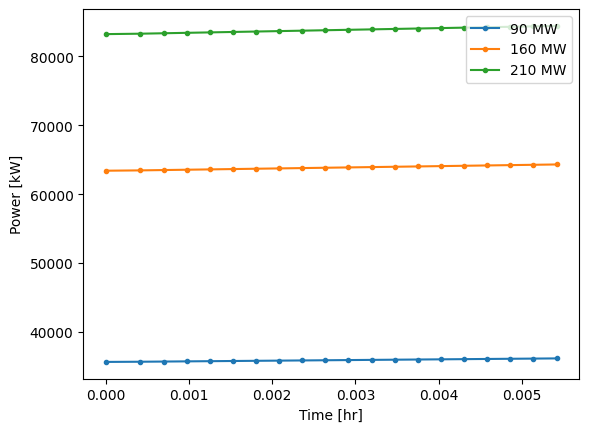

In [15]:
# plot just solar, comparing more than one output
system_sizes = [90, 160, 210] # MW
df = {}
for system_size in system_sizes:
    fn = "outputs/hercules_output_{}MW.csv".format(system_size)
    print(fn)
    df[system_size] = pd.read_csv(fn, index_col=False)


plt.figure()
for key in df.keys():
    plt.plot(time / 3600, df[key]["py_sims.solar_farm_0.outputs.power_mw"]*1000, '.-', label="{} MW".format(key))
    print(df[key]["py_sims.solar_farm_0.outputs.power_mw"][0]*1000)
plt.ylabel("Power [kW]")
plt.xlabel("Time [hr]")
plt.legend()

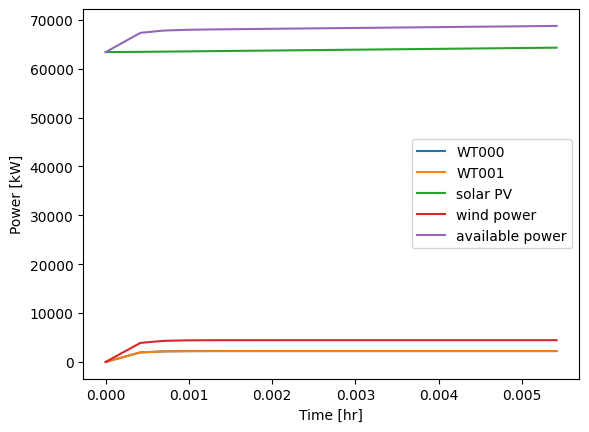

In [10]:
plt.figure()
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.000"], label="WT000")
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.001"], label="WT001")
plt.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="solar PV")
plt.plot(time / 3600, df["py_sims.inputs.available_power"], label="wind power")
plt.plot(time / 3600, df["py_sims.inputs.available_power"]+\
    df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="available power")
plt.ylabel("Power [kW]")
plt.xlabel("Time [hr]")
plt.legend()